'1.6.0'

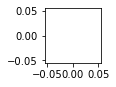

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# force plt on windows 10
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.plot()

import sys
sys.path.append("..")

import torch
import torch.nn as nn
import numpy as np
import aggets.ds.window as window
import aggets.ds.hyper_f_load as hfl
import aggets.ds.window as window
import aggets.train as train

## DISABLE THIS
import warnings
warnings.filterwarnings("ignore")
torch.__version__

In [2]:
import aggets.ds.hyper_f_load as hyper_f_load
data = hyper_f_load.load()

In [498]:
import aggets.ds.aggregate_nd as agg_nd
cols = ['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10']
train_np = agg_nd.as_np(data['train'], cols, 'class')
val_np = agg_nd.as_np(data['val'], cols, 'class')
test_np = agg_nd.as_np(data['test'], cols, 'class')

window = agg_nd.window_generator(train_np, val_np, test_np, window_size=500, e=0.00001, hist_bins=20, hist_dim=1)

ranges -> [[-9.9999997e-06  1.0000089e+00]
 [-6.9999996e-06  1.0000089e+00]
 [-9.9999997e-06  1.0000100e+00]
 [-8.9999994e-06  1.0000100e+00]
 [-8.9999994e-06  1.0000100e+00]
 [-9.9999997e-06  1.0000080e+00]
 [-8.9999994e-06  1.0000100e+00]
 [-9.9999997e-06  1.0000089e+00]
 [-6.9999996e-06  1.0000070e+00]
 [-5.9999998e-06  1.0000089e+00]
 [-9.9999997e-06  1.0000100e+00]]


In [499]:
window.init_structures()

In [3]:
import aggets.util as util
# util.save(window, path='nwindow_02.bin')
# w = util.load(path='nwindow_01.bin') # 5 bins, 2 dim, 500ws
w = util.load(path='nwindow_02.bin') # 20 bins, 1 dim, 500ws

In [4]:
print('aggregates')
print(w.train_agges.shape)
print(w.val_agges.shape)
print(w.test_agges.shape)
print('models')
print(w.train_models.shape)
print(w.val_models.shape)
print(w.test_models.shape)
print('')
from aggets.model.aggregate import WindowConfig
dl = w.wrapped(WindowConfig(output_sequence_length=5, input_sequence_length=10, label_stride=1),
              other={'source': 'lr', 'target': 'lr'}).train

print('sets')
def get_item_shape(item):
    if type(item) == list:
       return (item[0].shape, item[1].shape)
    return item.shape
[get_item_shape(l) for l in next(iter(dl))]


aggregates
torch.Size([1400, 5, 2, 10, 20])
torch.Size([400, 5, 2, 10, 20])
torch.Size([200, 5, 2, 10, 20])
models
torch.Size([1400, 5, 11])
torch.Size([400, 5, 11])
torch.Size([200, 5, 11])

sets


[torch.Size([32, 10, 11]), torch.Size([32, 5, 11])]

training model autoreg-lstm
saving model MTL=0.08634499747151603, MVL=0.2460621519655478
saving model MTL=0.08189722387472056, MVL=0.24473126647902316


<Figure size 432x288 with 0 Axes>

saving model MTL=0.08122355981905889, MVL=0.24413671332304596
saving model MTL=0.06641043961254132, MVL=0.09525379330896941
saving model MTL=0.0473479035091565, MVL=0.0950075663992616
saving model MTL=0.04004168625457496, MVL=0.09238457276684339
saving model MTL=0.033257375089322916, MVL=0.08811941461973503
saving model MTL=0.022727749314725675, MVL=0.08591923300848632
saving model MTL=0.020320370879178772, MVL=0.08572455544452198
saving model MTL=0.018652128184445994, MVL=0.08248249319244604
saving model MTL=0.017567929648686937, MVL=0.080116939593534


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

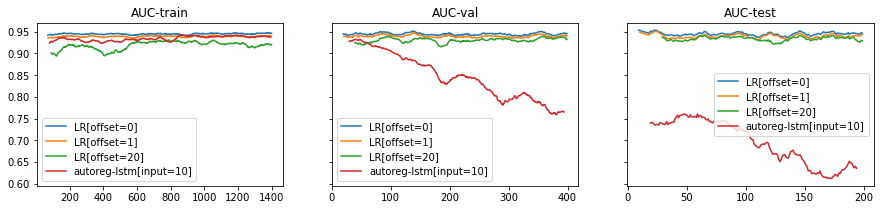

In [173]:
import aggets.model.aggregate2 as agg_m
import aggets.model.simple as simple
# HIST -> LR
hidden = 256

flatten = agg_m.Flatten(out_seq=5)
inp = nn.Sequential(
    flatten,
    simple.mlp(features=2250, num_layers=1, out_features=hidden)
)
out = simple.mlp(features=hidden, num_layers=1, out_features=11)

lstm = agg_m.AutoregLstm(input=inp, output=out, in_len=10, out_len=5, hidden=hidden)
# -------
lstm.name = 'autoreg-lstm'
train.train_window_models([lstm], w, patience=5, validate=True, weight_decay=0, max_epochs=1000,
                          lrs=[0.0001, 0.00001],
                          source='agg', target='lr', log=False)
# -------
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_lr(axs=axs)
w.plot_model(lstm, axs=axs, other={'source':'agg', 'target':'lr'})

training model autoreg-lstm
saving model MTL=0.10243497536547723, MVL=0.12916285336994734
saving model MTL=0.048940954223481194, MVL=0.09798446285431503
saving model MTL=0.028165756231216792, MVL=0.08640985019871446
saving model MTL=0.022720439900313655, MVL=0.08581966577006168
saving model MTL=0.02116245600450698, MVL=0.08454979895079723
saving model MTL=0.020009571677803442, MVL=0.08352131775168121
saving model MTL=0.01221356275684548, MVL=0.08333729189194616
saving model MTL=0.011346943526258391, MVL=0.0823005562434431
saving model MTL=0.01085276436489848, MVL=0.08181400792520555
saving model MTL=0.010443169344645765, MVL=0.07855669787672699
saving model MTL=0.010274905080516492, MVL=0.07850450765891154
saving model MTL=0.010066823724846137, MVL=0.07333314785214722
saving model MTL=0.009829709289192055, MVL=0.07127398802120177
saving model MTL=0.009500207770014963, MVL=0.06941946962329208
saving model MTL=0.009313464194776551, MVL=0.0649973202313556
saving model MTL=0.00919367768265

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

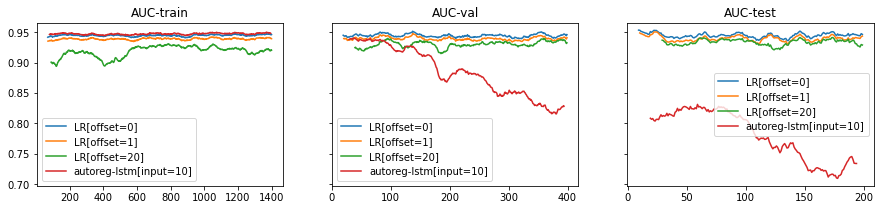

In [178]:
import aggets.model.aggregate2 as agg_m
import aggets.model.simple as simple
# HIST+LR -> LR
hidden = 256

inp = nn.Sequential(
    agg_m.FlatCat(),
    simple.mlp(features=2261, num_layers=1, out_features=hidden)
)
out = simple.mlp(features=hidden, num_layers=2, out_features=11)

lstm = agg_m.AutoregLstm(input=inp, output=out, in_len=10, out_len=5, hidden=hidden)
# -------
lstm.name = 'autoreg-lstm'
train.train_window_models([lstm], w, patience=10, validate=True, weight_decay=0, max_epochs=1000,
                          lrs=[0.0001, 0.00001],
                          source='all', target='lr', log=False)
# -------
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_lr(axs=axs)
w.plot_model(lstm, axs=axs, other={'source':'all', 'target':'lr'})

In [368]:
import aggets.model.aggregate2 as agg_m
import aggets.model.simple as simple
# HIST[0] -> HIST[0]
size = 2250 // 2
hidden = 256

flatten = agg_m.Flatten(out_seq=5)
inp = nn.Sequential(
    flatten,
    simple.mlp(features=size, num_layers=1, out_features=hidden)
)
out = nn.Sequential(
    simple.mlp(features=hidden, num_layers=1, out_features=size),
    flatten.reverse()
)
lstm = agg_m.AutoregLstm(input=inp, output=out, in_len=10, out_len=5, hidden=hidden)
# -------
lstm.name = 'autoreg-lstm'
train.train_window_models([lstm], w, patience=10, validate=True, weight_decay=0, max_epochs=1000,
                          lrs=[0.0001],
                          source='agg[0]', target='agg[0]', log=False)
# -------
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0, 0])
w.plot_model_agg_dist(model=lstm, axs=axs, other={'source': 'agg[0]', 'target': 'agg[0]'})

training model autoreg-lstm
saving model MTL=0.10901424158278698, MVL=0.05989811392348321
saving model MTL=0.03726171298716475, MVL=0.05797499039622604
saving model MTL=0.03634222351392293, MVL=0.04768224335351928
saving model MTL=0.03331869141915427, MVL=0.04129322380071781
saving model MTL=0.03217245404896099, MVL=0.0412395467035106
saving model MTL=0.031114313511117812, MVL=0.040976333935729796
saving model MTL=0.029705175031234043, MVL=0.040543425706077794
saving model MTL=0.02930724881761085, MVL=0.04026223676370793
saving model MTL=0.029207132507785123, MVL=0.039987398280960616
saving model MTL=0.029137960699502773, MVL=0.0398023114463345
saving model MTL=0.029015130427781886, MVL=0.03963555774239243
saving model MTL=0.02893010251361379, MVL=0.03959825891451758


<Figure size 432x288 with 0 Axes>

training model autoreg-lstm
saving model MTL=0.17152559661537137, MVL=0.084447943040582
saving model MTL=0.07286000248352321, MVL=0.08334250406163637
saving model MTL=0.07284471009849408, MVL=0.0811735038630298
saving model MTL=0.07181052016008885, MVL=0.07582917577419125
saving model MTL=0.07075182751778068, MVL=0.07485064412238168
saving model MTL=0.06916740170996123, MVL=0.0745175907113513
saving model MTL=0.06889695532346538, MVL=0.07427900431097531
saving model MTL=0.06875480077477224, MVL=0.07377006956299798
saving model MTL=0.06875908309850123, MVL=0.07354590199032768
saving model MTL=0.0685846610763751, MVL=0.0735285288242043
saving model MTL=0.06820296185142403, MVL=0.07331231273100024
saving model MTL=0.06811610192333886, MVL=0.07302510872727534
saving model MTL=0.06804969688074304, MVL=0.07294968039285941
saving model MTL=0.0679374760649073, MVL=0.07284765250858713
saving model MTL=0.06789055056528213, MVL=0.07254003660112131
saving model MTL=0.06770566249385886, MVL=0.07242

<Figure size 432x288 with 0 Axes>

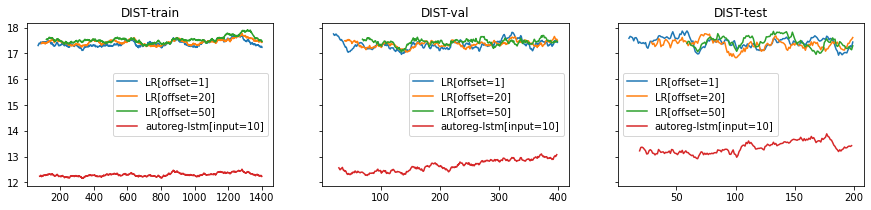

In [404]:
import aggets.model.aggregate2 as agg_m
import aggets.model.simple as simple
# HIST -> HIST
size = 2250
hidden = 256
_out = 1

flatten = agg_m.Flatten(out_seq=_out)
inp = nn.Sequential(
    flatten,
    simple.mlp(features=size, num_layers=1, out_features=hidden)
)
out = nn.Sequential(
    simple.mlp(features=hidden, num_layers=1, out_features=size),
    flatten.reverse()
)
lstm = agg_m.AutoregLstm(input=inp, output=out, in_len=10, out_len=_out, hidden=hidden)
# -------
lstm.name = 'autoreg-lstm'
train.train_window_models([lstm], w, patience=10, validate=True, weight_decay=0, max_epochs=1000,
                          lrs=[0.0001],
                          source='agg', target='agg', log=False)
# ------- p + d hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0])
w.plot_model_agg_dist(model=lstm, axs=axs, other={'source': 'agg', 'target': 'agg'})

# ------- p hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0, 0])
w.plot_model_agg_dist(model=lstm, axs=axs, other={'source': 'agg', 'target': 'agg'}, select=lambda x: x[:, 0, 0])

# ------- d hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0, 1])
w.plot_model_agg_dist(model=lstm, axs=axs, other={'source': 'agg', 'target': 'agg'}, select=lambda x: x[:, 0, 1])

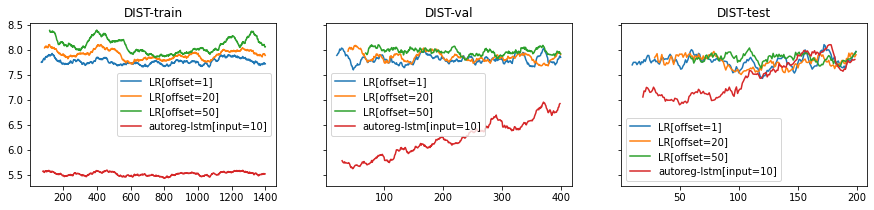

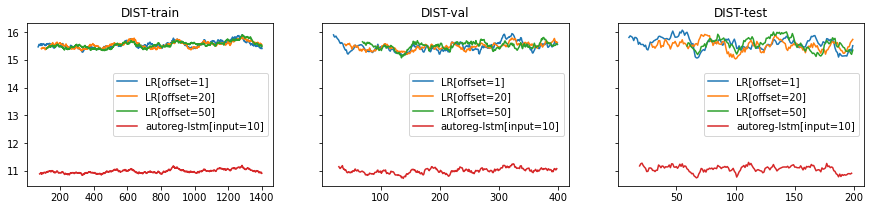

training model autoreg-lstm
saving model MTL=0.10315247616528915, MVL=0.17878947223796218
saving model MTL=0.053223685185480776, MVL=0.103258735943036
saving model MTL=0.03222738975478757, MVL=0.09139698059832463
saving model MTL=0.025330077779526533, MVL=0.0913657896587106
saving model MTL=0.022367728359070242, MVL=0.09021177753561833
saving model MTL=0.02015136583163167, MVL=0.08818331495171687
saving model MTL=0.01883303320833615, MVL=0.08615341581037787
saving model MTL=0.018239157866635082, MVL=0.08448239953302947
saving model MTL=0.01776355047482774, MVL=0.08235719677854757
saving model MTL=0.017403015497780065, MVL=0.08206670132816815
saving model MTL=0.01703455745487169, MVL=0.08072367847942916
saving model MTL=0.01662145377338482, MVL=0.07980412843286014
saving model MTL=0.016247332615408755, MVL=0.07884422506465287
saving model MTL=0.015311688407912232, MVL=0.0784900747850293
saving model MTL=0.013644272362821936, MVL=0.07791892451341034
saving model MTL=0.013533362075858127,

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

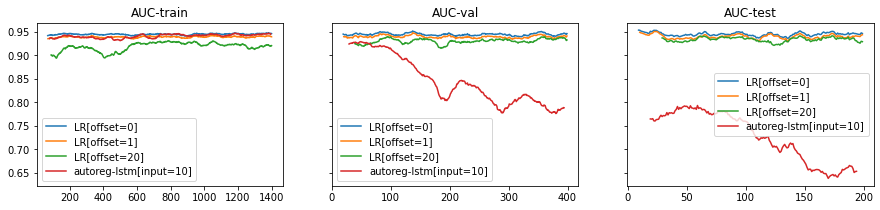

In [179]:
import aggets.model.aggregate2 as agg_m
import aggets.model.simple as simple
# LR -> LR
size = 11
hidden = 16
inp = simple.mlp(features=size, num_layers=1, out_features=hidden)
out = simple.mlp(features=hidden, num_layers=1, out_features=size)
lstm = agg_m.AutoregLstm(input=inp, output=out, in_len=10, out_len=5, hidden=16)
# -------
lstm.name = 'autoreg-lstm'
train.train_window_models([lstm], w, patience=20, validate=True, weight_decay=0, max_epochs=1000,
                          lrs=[0.001, 0.0001],
                          source='lr', target='lr', log=False)
# -------
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_lr(axs=axs)
w.plot_model(lstm, axs=axs, other={'source':'lr', 'target':'lr'})

training model autoreg-lstm
saving model MTL=0.4741213728892638, MVL=0.3689233851237375
saving model MTL=0.1597724387310617, MVL=0.3362335391709062
saving model MTL=0.1515139351654712, MVL=0.25200953395640263
saving model MTL=0.12229025020577391, MVL=0.1736828758091223
saving model MTL=0.10781886064649178, MVL=0.16070879287407047
saving model MTL=0.09211163830509933, MVL=0.15925990411492644
saving model MTL=0.08137580766106531, MVL=0.1591023148083296
saving model MTL=0.08030585426202018, MVL=0.1564094907924777
saving model MTL=0.07945168176279639, MVL=0.1547835290920539


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

TypeError: tuple indices must be integers or slices, not tuple

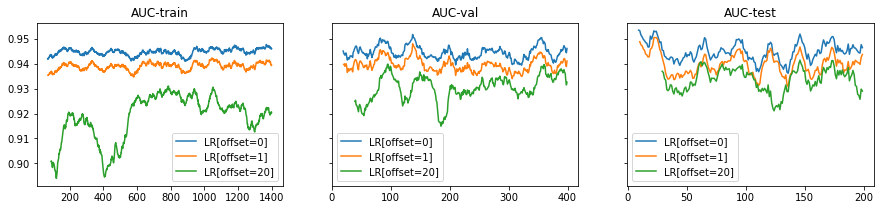

In [488]:
import aggets.model.aggregate2 as agg_m
import aggets.model.simple as simple
# HIST+LR -> HIST+LR
hidden = 512
flatcat = agg_m.FlatCat()

inp = nn.Sequential(
    flatcat,
    simple.mlp(features=2261, num_layers=2, out_features=hidden)
)
out = nn.Sequential(
    simple.mlp(features=hidden, num_layers=2, out_features=2261),
    flatcat.reverse()
)
lstm = agg_m.AutoregLstm(input=inp, output=out, in_len=10, out_len=1, hidden=hidden, num_layers=2)

loss = nn.MSELoss()

def criterion(x, y):
    return loss(x[0], y[0]) + loss(x[1], y[1])
# -------
lstm.name = 'autoreg-lstm'
train.train_window_models([lstm], w, patience=10, validate=True, weight_decay=0, max_epochs=1000,
                          lrs=[0.0001],
                          source='all', target='all', log=False,
                          criterion=criterion)
# -------
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_lr(axs=axs)
w.plot_model(lstm, axs=axs, other={'source':'all', 'target':'all'}, select=lambda x: x[1])

In [15]:
import aggets.model.aggregate2 as agg_m
import aggets.model.simple as simple
import aggets.model.fourier as fourier
# HIST -> HIST
size = 20

frr = fourier.HistogramLerner(size=size, hists=1, types=10, t_in=10)
frr = fourier.FAdapter2(frr)
frr.window_config = WindowConfig(output_sequence_length=1, input_sequence_length=10, label_stride=1)
# -------
frr.name = 'fourier'
train.train_window_models([frr], w, patience=2, validate=True, weight_decay=0, max_epochs=10,
                          lrs=[0.01, 0.001, 0.0001],
                          source='agg[0]', target='agg[0]', log=False)
# ------- p + d hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0])
w.plot_model_agg_dist(model=frr, axs=axs, other={'source': 'agg', 'target': 'agg'})

# ------- p hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0, 0])
w.plot_model_agg_dist(model=frr, axs=axs, other={'source': 'agg', 'target': 'agg'}, select=lambda x: x[:, 0, 0])

# ------- d hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0, 1])
w.plot_model_agg_dist(model=frr, axs=axs, other={'source': 'agg', 'target': 'agg'}, select=lambda x: x[:, 0, 1])

training model fourier


RuntimeError: shape '[3200, 20, 10]' is invalid for input of size 64000

<Figure size 432x288 with 0 Axes>

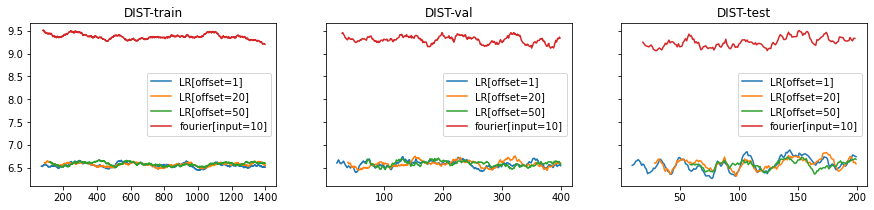

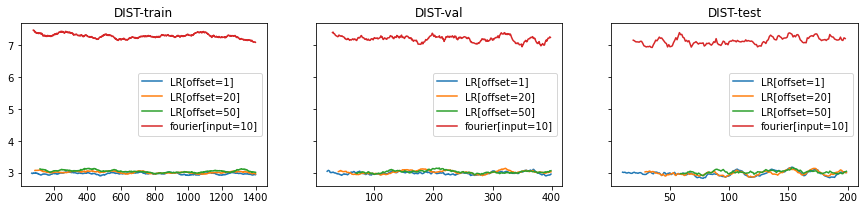

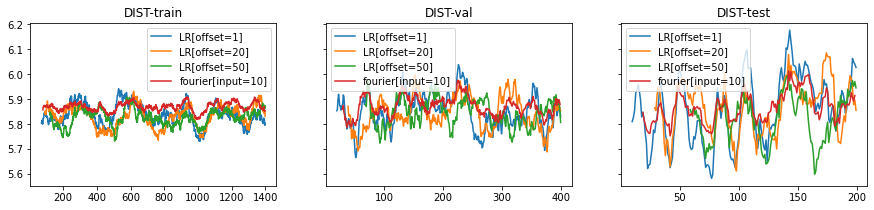

In [13]:
# ------- p + d hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0])
w.plot_model_agg_dist(model=frr, axs=axs, other={'source': 'agg', 'target': 'agg'})

# ------- p hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0, 0])
w.plot_model_agg_dist(model=frr, axs=axs, other={'source': 'agg', 'target': 'agg'}, select=lambda x: x[:, 0, 0])

# ------- d hist
_, axs = plt.subplots(ncols=3, nrows=1, sharey='row', figsize=(15, 3))
w.plot_agg_dist(axs=axs, select=lambda a: a[:, 0, 1])
w.plot_model_agg_dist(model=frr, axs=axs, other={'source': 'agg', 'target': 'agg'}, select=lambda x: x[:, 0, 1])